In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1) IMPORT & INSTALL PACKAGES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import metrics as mt

%matplotlib inline
pylab.rcParams['figure.figsize'] = 6,4

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
################# Graficos ###################
								 
def graph_countplots(base1 = None, base2 = pd.DataFrame(), vars_to_plot = None):
    n = len(vars_to_plot)
    plt.figure(figsize=(80,10*n)) 
    for i in range(0,len(vars_to_plot)):
        plt.subplot(len(vars_to_plot),2,2*i+1)
        sns.countplot(x = vars_to_plot[i], data = base1, order = base1[vars_to_plot[i]].value_counts(dropna=False).index)
        if len(base2) != 0:
            plt.subplot(len(vars_to_plot),2,2*i+2)
            sns.countplot(x = vars_to_plot[i], data = base2, order = base2[vars_to_plot[i]].value_counts(dropna=False).index)

def graph_factorplots(base = None, vars_to_plot = None, target = None):
    n = len(vars_to_plot)
    i = 0 
    for var in vars_to_plot:
        sns.factorplot(x = target, col = var, kind='count', data=base)
        i += 1
			
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 18))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)


def graph_distplots(base = None, vars_to_plot = None):
    n = len(vars_to_plot)
    plt.figure(figsize=(10,4.5*n)) 
    for i in range(0,len(vars_to_plot)):
        plt.subplot(len(vars_to_plot),1,i+1)
        sns.distplot(base[vars_to_plot[i]], kde=False)	
	
def graph_kdeplots(base = None, vars_to_plot = None, target = None):
    n = len(vars_to_plot)
    plt.figure(figsize=(10,3.5*n)) 
    for i in range(0,len(vars_to_plot)):
        g = sns.FacetGrid(base, hue=target, size = 5)
        g.map(sns.kdeplot, vars_to_plot[i], shade=True).add_legend()
        sns.despine(left=True, bottom=True)
        plt.show()

def graph_boxplots(base = None, vars_to_plot = None, target = None):
    n = len(vars_to_plot)
    if target == None: 
        plt.figure(figsize=(3,4.5*n))
    else:
        plt.figure(figsize=(5,4.5*n))
    for i in range(0,len(vars_to_plot)):
        plt.subplot(len(vars_to_plot),1,i+1)
        if target == None:
            sns.boxplot(y=vars_to_plot[i], data=base, color="orange")
        else:
            sns.boxplot(x=target, y=vars_to_plot[i], data=base, palette="PRGn")
		
def view_distribution(var, n_bins):
    import matplotlib.pyplot as plt
    plt.figure(1)
    plt.subplot(211)
    data_ini.loc[data_ini["train_test"]=='train',var].hist(bins = n_bins)
    plt.subplot(212)
    data_ini.loc[data_ini["train_test"]=='test',var].hist(bins = n_bins)

#### Calculos

	  
def fx_porc_missings(data, only_missings = False):
    df_vars_missings = pd.concat([pd.DataFrame(data.isnull().sum(), columns = ['n_nulos']),
           pd.DataFrame(100*data.isnull().sum()/len(data), columns = ['%Total'])], axis = 1)
    if only_missings:
        return(df_vars_missings[df_vars_missings["n_nulos"]!=0])
    else:
        return(df_vars_missings)

def fx_percentiles_en_lista(lista):
    vector_percentiles = [0,0.5,1,2.5,5,10,25,50,75,90,92.5,95,97.5,99,99.5,100]
    return(pd.concat([pd.DataFrame(vector_percentiles, columns = ['Percentile']),
                     pd.DataFrame(np.nanpercentile(lista, vector_percentiles), 
                                  columns = ['Valor'])], axis = 1))

def cross_target(base,var,target):
    print("----------------------------------------------------------------")
    print("---- Var: ",var)
    print(pd.concat([pd.DataFrame(base[:][var].value_counts().index, columns = ['Atributo']),
           pd.DataFrame(base[:][var].value_counts().values, columns = ['Cantidad']),
           pd.DataFrame(100*base[:][var].value_counts().values/len(base), columns = ['%Total'])], axis = 1))
    
    temp = pd.DataFrame(np.array(base.groupby(var, as_index = False, axis = 0)[target].mean()), 
                         columns = [var,"% ratio_conv"])
    temp["% ratio_conv"] = temp["% ratio_conv"]*100
    temp = temp.sort_values(by = ['% ratio_conv'], ascending = [False])
    print("")
    print(temp)


def resumen_numerical_cols(data, list_cols, target):
    for var in list_cols:
        print(var,":",end="")
        display(data.groupby(target)[var].describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99]))

# 2) DATA UNDERSTANDING

In [ ]:
#data = pd.read_excel('/content/drive/MyDrive/IAA Trabajos/Modelos/union_escalado.xlsx')
data = pd.read_excel('/content/drive/MyDrive/IAA Trabajos/Modelos/union.xlsx')
data.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,f1_mean,f2_mean,f3_mean,f4_mean,f1_median,f2_median,f3_median,f4_median,IDAUDIO,EDAD,GENERO,status
0,1000-a_n.wav,1.13120,106.344493,3.130821,21.645715,0.006009,0.000057,0.002307,0.003618,0.006920,0.031649,0.280745,0.016429,0.019516,0.027407,0.049287,493.748977,1031.263321,2279.838566,4140.811754,492.531721,1030.645536,2280.248380,4143.747930,1000-a_n.wav,31,M,0
1,145-a_n.wav,0.97002,224.922355,1.935428,23.573091,0.002358,0.000010,0.001238,0.001323,0.003714,0.024186,0.212943,0.012458,0.014558,0.020476,0.037374,690.083369,1355.901264,2985.243133,4071.046254,688.866021,1356.431954,2976.197315,4068.760685,145-a_n.wav,28,F,0
2,1278-a_n.wav,1.66352,200.923193,2.274124,25.433743,0.005071,0.000025,0.003127,0.002779,0.009380,0.030630,0.269344,0.017588,0.018340,0.019557,0.052763,799.080462,1320.220970,2902.116608,4050.867971,791.329638,1323.871591,2919.166164,4056.091223,1278-a_n.wav,34,F,0
3,1352-a_n.wav,1.34984,214.149866,1.105750,23.097469,0.007222,0.000034,0.004691,0.003468,0.014074,0.019403,0.167589,0.010699,0.011452,0.016516,0.032098,657.975046,1129.622174,2680.795743,3458.638514,656.745890,1128.599196,2677.815173,3458.432306,1352-a_n.wav,35,F,0
4,1180-a_n.wav,1.97650,220.829172,1.586846,21.516045,0.005504,0.000025,0.003326,0.003118,0.009978,0.024362,0.221930,0.012475,0.015435,0.020531,0.037426,753.356862,1281.375046,2476.119035,3746.676762,751.632864,1288.289241,2473.047470,3723.773439,1180-a_n.wav,28,F,0


In [ ]:
data=data.drop('IDAUDIO',axis=1)
data=data.drop('duration',axis=1)
data=data.drop('f4_mean',axis=1)
data=data.drop('f4_median',axis=1)

In [ ]:
"""data=data.drop('duration',axis=1)"""
data=data.drop('EDAD',axis=1)

In [ ]:
data.shape

(398, 23)

In [ ]:
y_value_counts = data['status'].value_counts()
print("Numero de casos que padecen de Parkinson : ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Numero de casos que no padecende Parkison : ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

Numero de casos que padecen de Parkinson :  254 , ( 63.81909547738693 %)
Numero de casos que no padecende Parkison :  144 , ( 36.18090452261307 %)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   voiceID              398 non-null    object 
 1   meanF0Hz             398 non-null    float64
 2   stdevF0Hz            398 non-null    float64
 3   HNR                  398 non-null    float64
 4   localJitter          398 non-null    float64
 5   localabsoluteJitter  398 non-null    float64
 6   rapJitter            398 non-null    float64
 7   ppq5Jitter           397 non-null    float64
 8   ddpJitter            398 non-null    float64
 9   localShimmer         398 non-null    float64
 10  localdbShimmer       398 non-null    float64
 11  apq3Shimmer          397 non-null    float64
 12  apq5Shimmer          394 non-null    float64
 13  apq11Shimmer         390 non-null    float64
 14  ddaShimmer           397 non-null    float64
 15  f1_mean              398 non-null    flo

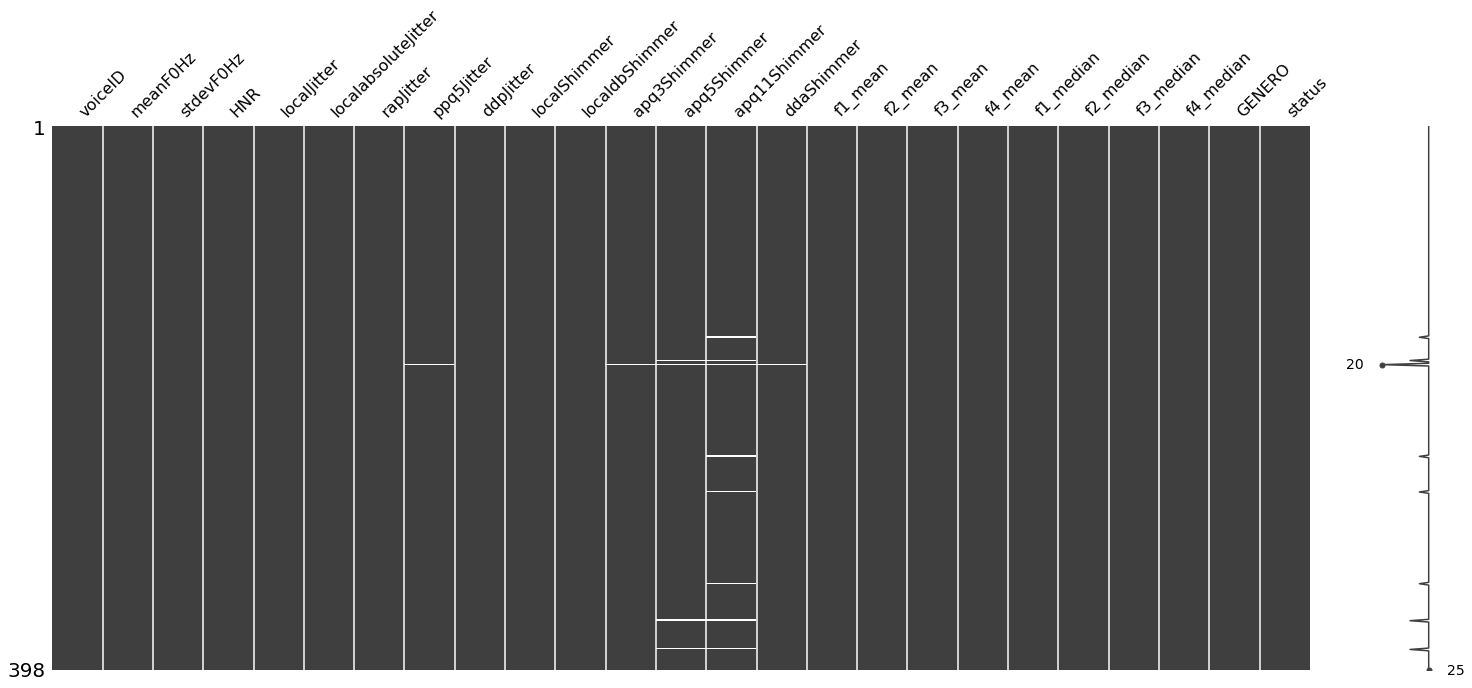

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
meanF0Hz,398,NaN,NaN,NaN,1.80481e-16,1.00126,-1.6167,-0.922081,-0.260076,0.966891,2.42577
stdevF0Hz,398,NaN,NaN,NaN,1.38081e-17,1.00126,-0.673163,-0.438957,-0.274995,-0.112044,7.61219
HNR,398,NaN,NaN,NaN,-3.6138e-16,1.00126,-3.19016,-0.570663,0.146664,0.685568,2.76178
localJitter,398,NaN,NaN,NaN,-6.36007e-17,1.00126,-0.907055,-0.38423,-0.233814,0.0361532,8.46985
localabsoluteJitter,398,NaN,NaN,NaN,2.21766e-17,1.00126,-0.831006,-0.468969,-0.258264,0.139356,10.2193
rapJitter,398,NaN,NaN,NaN,2.99872e-18,1.00126,-0.916594,-0.367702,-0.246802,0.011069,9.35823
ppq5Jitter,397,NaN,NaN,NaN,4.23675e-17,1.00126,-1.08463,-0.31925,-0.196898,0.028562,10.7889
ddpJitter,398,NaN,NaN,NaN,2.02936e-17,1.00126,-0.916594,-0.367702,-0.246802,0.011069,9.35823
localShimmer,398,NaN,NaN,NaN,9.62379e-18,1.00126,-1.05301,-0.493137,-0.253471,0.174389,10.1415
localdbShimmer,398,NaN,NaN,NaN,-9.0101e-17,1.00126,-1.25291,-0.569191,-0.270613,0.237319,8.15123


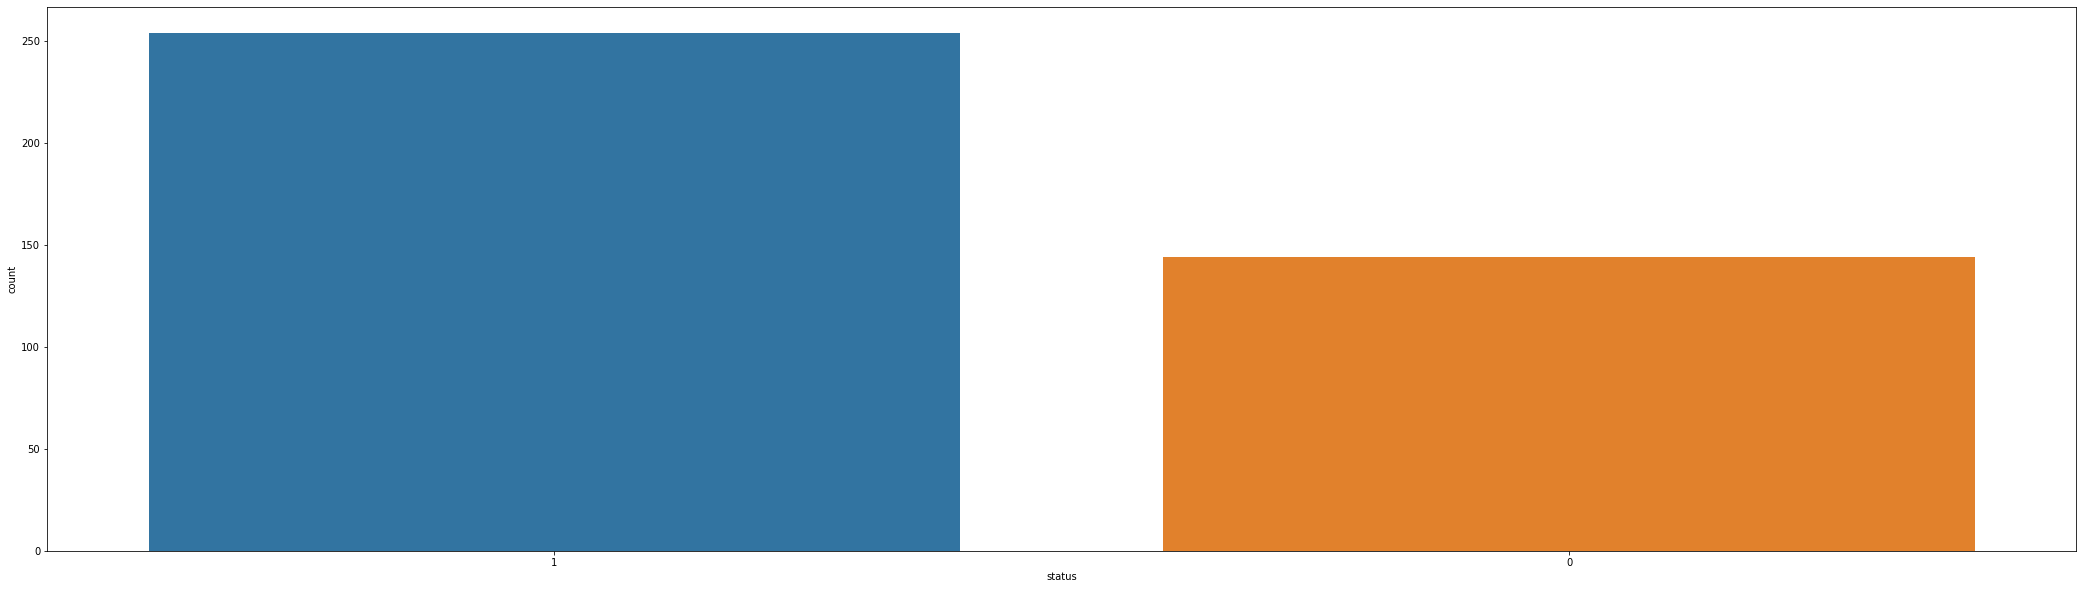

In [ ]:
graph_countplots(base1 = data, vars_to_plot = ['status']) 
# Target desvalanceado

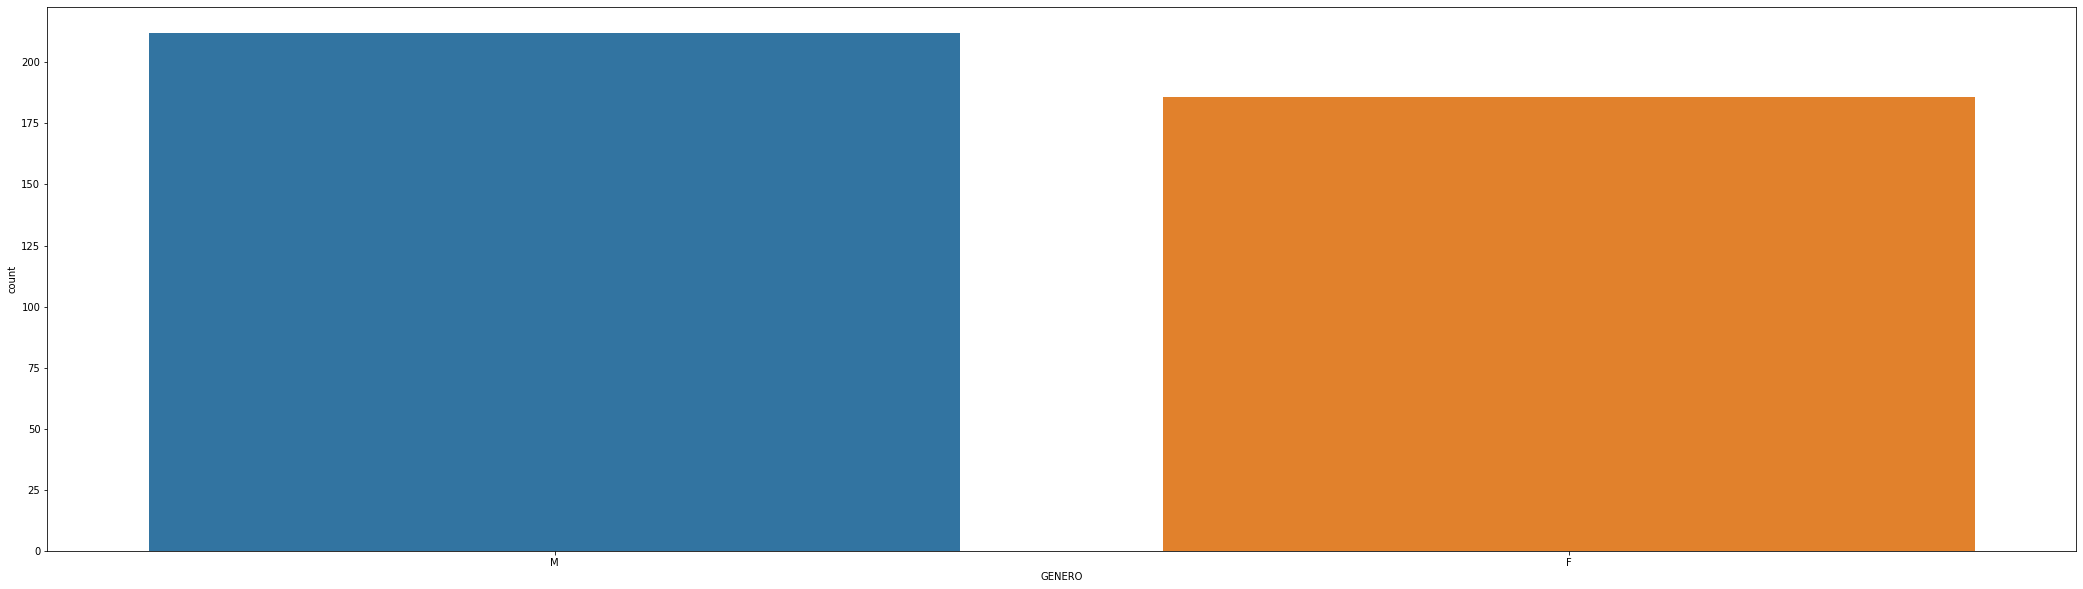

In [ ]:
graph_countplots(base1 = data, vars_to_plot = ['GENERO']) 

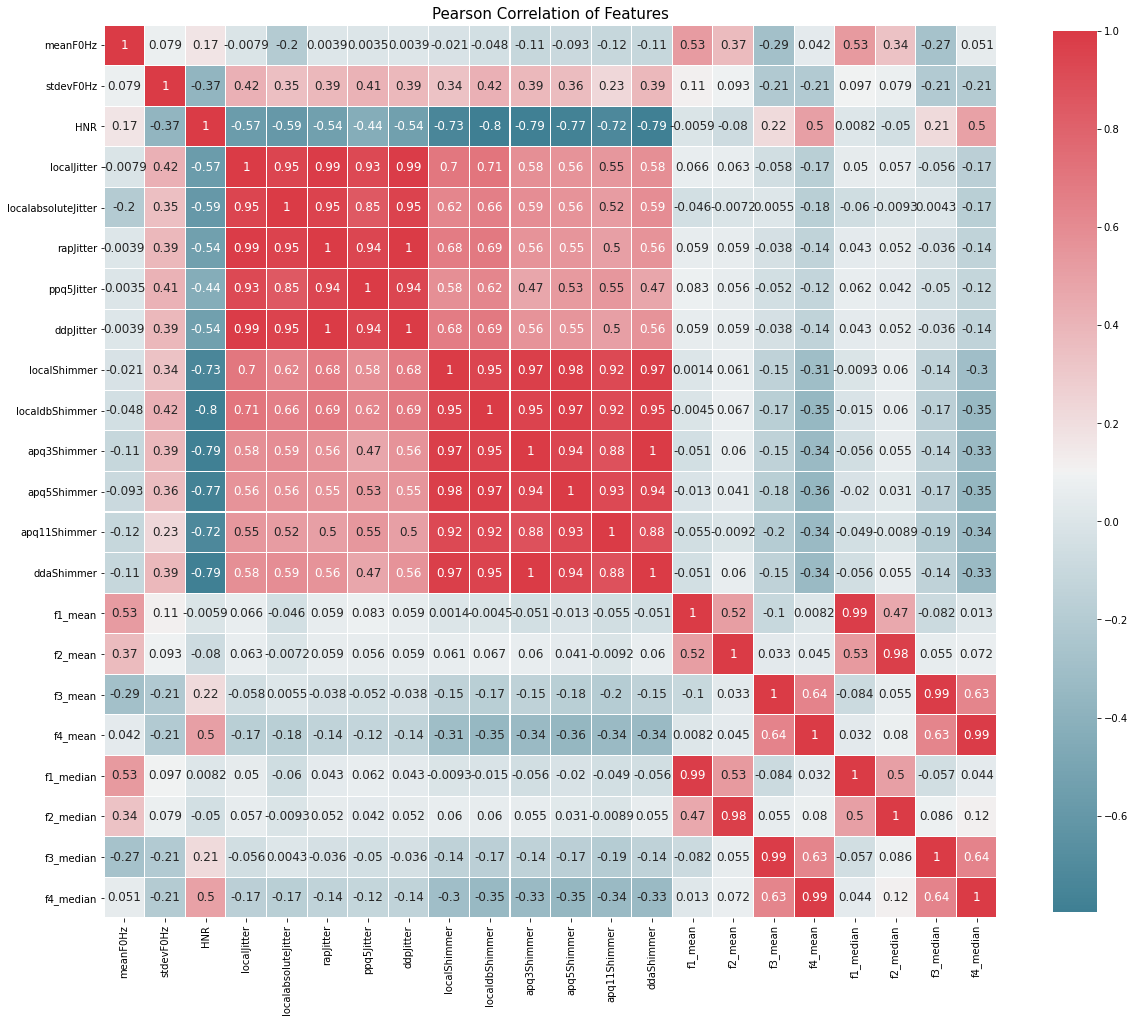

In [ ]:
correlation_heatmap(data.drop(["voiceID","status","GENERO"],axis=1))

In [ ]:
vars_num = data.select_dtypes(include=['int','float']).drop(columns=['status']).columns.tolist()
vars_num

['meanF0Hz',
 'stdevF0Hz',
 'HNR',
 'localJitter',
 'localabsoluteJitter',
 'rapJitter',
 'ppq5Jitter',
 'ddpJitter',
 'localShimmer',
 'localdbShimmer',
 'apq3Shimmer',
 'apq5Shimmer',
 'apq11Shimmer',
 'ddaShimmer',
 'f1_mean',
 'f2_mean',
 'f3_mean',
 'f1_median',
 'f2_median',
 'f3_median']

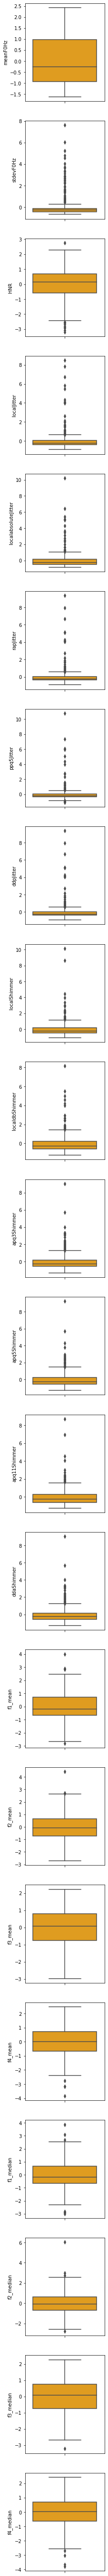

In [ ]:
graph_boxplots(base = data, vars_to_plot = vars_num)

# 3) DATA PREPARATION


In [ ]:
# Valores nulos
# imputacion por MEDIANA
'''
data["JitterPCA"].fillna(-0.213073, inplace = True)
data["ShimmerPCA"].fillna(0.0992698, inplace = True)
'''
data["ppq5Jitter"].fillna(data.ppq5Jitter.median(),inplace=True)
data["apq5Shimmer"].fillna(data.apq5Shimmer.median(),inplace=True)
data["apq3Shimmer"].fillna(data.apq3Shimmer.median(),inplace=True)
data["apq11Shimmer"].fillna(data.apq11Shimmer.median(), inplace = True)
data["ddaShimmer"].fillna(data.ddaShimmer.median(),inplace=True)

In [ ]:
data

,voiceID,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,f1_mean,f2_mean,f3_mean,f1_median,f2_median,f3_median,GENERO,status
0,1000-a_n.wav,106.344493,3.130821,21.645715,0.006009,0.000057,0.002307,0.003618,0.006920,0.031649,0.280745,0.016429,0.019516,0.027407,0.049287,493.748977,1031.263321,2279.838566,492.531721,1030.645536,2280.248380,M,0
1,145-a_n.wav,224.922355,1.935428,23.573091,0.002358,0.000010,0.001238,0.001323,0.003714,0.024186,0.212943,0.012458,0.014558,0.020476,0.037374,690.083369,1355.901264,2985.243133,688.866021,1356.431954,2976.197315,F,0
2,1278-a_n.wav,200.923193,2.274124,25.433743,0.005071,0.000025,0.003127,0.002779,0.009380,0.030630,0.269344,0.017588,0.018340,0.019557,0.052763,799.080462,1320.220970,2902.116608,791.329638,1323.871591,2919.166164,F,0
3,1352-a_n.wav,214.149866,1.105750,23.097469,0.007222,0.000034,0.004691,0.003468,0.014074,0.019403,0.167589,0.010699,0.011452,0.016516,0.032098,657.975046,1129.622174,2680.795743,656.745890,1128.599196,2677.815173,F,0
4,1180-a_n.wav,220.829172,1.586846,21.516045,0.005504,0.000025,0.003326,0.003118,0.009978,0.024362,0.221930,0.012475,0.015435,0.020531,0.037426,753.356862,1281.375046,2476.119035,751.632864,1288.289241,2473.047470,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,pva_9227397_2014-01-13-190728.wav,115.335579,2.463644,19.399020,0.004775,0.000041,0.002139,0.002171,0.006418,0.044065,0.405501,0.023233,0.028654,0.037740,0.069700,598.126849,1121.876784,2289.885995,596.538910,1127.717424,2293.476921,M,1
394,pva_9040339_2014-01-11-191437.wav,251.244326,2.580495,21.321007,0.003770,0.000015,0.002097,0.001867,0.006291,0.038254,0.333767,0.020327,0.024234,0.030167,0.060982,716.296434,1232.842231,1853.325261,716.190940,1230.147721,1859.037024,F,1
395,pva_9245595_2014-01-12-201731.wav,215.850798,6.011179,21.911093,0.003863,0.000018,0.001691,0.002437,0.005073,0.040784,0.358763,0.020680,0.026846,0.038979,0.062039,783.766292,1192.150521,1492.043931,786.437478,1193.335449,1455.385947,F,1
396,pva_9100523_2014-01-12-055713.wav,186.423984,22.592263,7.674644,0.029789,0.000161,0.015419,0.018037,0.046257,0.159181,1.403237,0.088372,0.102084,0.126112,0.265117,835.637827,1356.036631,1894.254907,843.939702,1387.222313,1914.751981,F,1


In [ ]:
# Sexo 
dicc_sexo = {'M': 1, 'F':0 }
data["GENERO"] = data["GENERO"].map(dicc_sexo)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
"""data = pd.read_csv('parkinsons.txt')"""
y=data.status
x=data.drop(["voiceID","status"],axis=1)
scaler = StandardScaler()
"""x = scaler.fit_transform(x)"""
#x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

# 4) MODELING & EVALUATION

## 4.1) RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0,class_weight="balanced")
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Generar las predicciones:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(x_train)[:,1]
y_pred_proba_test = model.predict_proba(x_test)[:,1]

In [ ]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.89568345323741
Accuracy - Test : 0.8


In [ ]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = pd.DataFrame(x_train).columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)
df_feature_importances

,feature,importance
0,localdbShimmer,0.163237
1,apq3Shimmer,0.139035
2,HNR,0.117895
3,ddaShimmer,0.107245
4,apq5Shimmer,0.105558
5,f3_median,0.077235
6,f3_mean,0.070586
7,apq11Shimmer,0.066404
8,stdevF0Hz,0.060773
9,localShimmer,0.058251


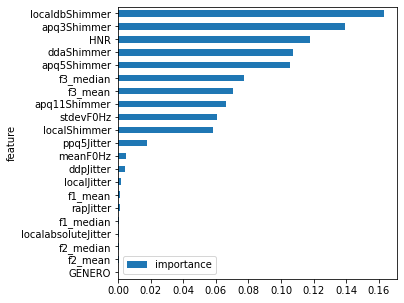

In [ ]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

FUNCIONES PARA LA EVALUACIÓN DEL MODELO

In [ ]:

def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)  
def fx_evaluate_classif(y_real, pred, pred_proba):
    from sklearn import metrics as mt
    matriz_conf = mt.confusion_matrix(y_real,pred)
    print_mc(matriz_conf)
    roc = mt.roc_auc_score(y_real,pred_proba)
    accuracy_real = mt.accuracy_score(y_real,pred)
    print("\nROC: ", roc) 
    print("Accu:", accuracy_real,'\n')
    print(mt.classification_report(y_real, pred)[0:163])

In [ ]:
#Probando el modelo
print("Metricas del Training..." + "\n")
fx_evaluate_classif(y_train, y_pred_train, y_pred_proba_train)
print("Metricas del Testing..." + "\n")
fx_evaluate_classif(y_test, y_pred_test, y_pred_proba_test)

Metricas del Training...

        Pred_0  Pred_1
Real_0      92       9
Real_1      20     157

ROC:  0.9770655031604855
Accu: 0.89568345323741 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       101
           1       0.95      0.89      0.92       177

Metricas del Testing...

        Pred_0  Pred_1
Real_0      30      13
Real_1      11      66

ROC:  0.9112050739957717
Accu: 0.8 

              precision    recall  f1-score   support

           0       0.73      0.70      0.71        43
           1       0.84      0.86      0.85        77



## 4.2) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors': [2,3,4,5,6,7,8]}]
model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(x_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# Generar las predicciones:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(x_train)[:,1]
y_pred_proba_test = model.predict_proba(x_test)[:,1]

In [ ]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8129496402877698
Accuracy - Test : 0.85


In [ ]:
# Getting results
best_params_ = model.best_params_ # La mejor combinacion de parametros (el mejor modelo)
score_ = model.best_score_ # El mejor score del CV
best_model_grid = model.best_estimator_ # Exporta el mejor modelo entrenado de todos los tuneados.

In [ ]:
best_params_

{'n_neighbors': 3}

In [ ]:
score_

0.7771428571428571

In [ ]:
best_model_grid

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Probando el modelo
print("Metricas del Training..." + "\n")
fx_evaluate_classif(y_train, y_pred_train, y_pred_proba_train)
print("Metricas del Testing..." + "\n")
fx_evaluate_classif(y_test, y_pred_test, y_pred_proba_test)

Metricas del Training...

        Pred_0  Pred_1
Real_0      76      25
Real_1      27     150

ROC:  0.9063880964367623
Accu: 0.8129496402877698 

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       101
           1       0.86      0.85      0.85       177

Metricas del Testing...

        Pred_0  Pred_1
Real_0      34       9
Real_1       9      68

ROC:  0.8785865297493205
Accu: 0.85 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        43
           1       0.88      0.88      0.88        77



## 4.3) SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(probability=True,class_weight='balanced'),scoring='accuracy' ,param_grid=param_grid, cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid.best_estimator_)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1e-08,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


# EXPORTAR MODELO


In [ ]:
from sklearn.externals import joblib 
joblib.dump(grid, 'modelo_parkinson.pkl') # Guardo el modelo.

['modelo_parkinson.pkl']

In [ ]:
# Generar las predicciones:
y_pred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

# Generar las probabilidades
y_pred_proba_train = grid.predict_proba(x_train)[:,1]
y_pred_proba_test = grid.predict_proba(x_test)[:,1]

In [ ]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.9496402877697842
Accuracy - Test : 0.8916666666666667


In [ ]:
#Probando el modelo
print("Metricas del Training..." + "\n")
fx_evaluate_classif(y_train, y_pred_train, y_pred_proba_train)
print("Metricas del Testing..." + "\n")
fx_evaluate_classif(y_test, y_pred_test, y_pred_proba_test)

Metricas del Training...

        Pred_0  Pred_1
Real_0      97       4
Real_1      10     167

ROC:  0.9881411870000559
Accu: 0.9496402877697842 

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       101
           1       0.98      0.94      0.96       177

Metricas del Testing...

        Pred_0  Pred_1
Real_0      39       4
Real_1       9      68

ROC:  0.959830866807611
Accu: 0.8916666666666667 

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        43
           1       0.94      0.88      0.91        77



In [ ]:
from sklearn.externals import joblib 
joblib.dump(model, 'modelo_parkinson.pkl') # Guardo el modelo.

['modelo_parkinson.pkl']